# Análise dos dados de Energia e CO2

In [38]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

from pmdarima.arima import auto_arima
from pmdarima import arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6
from pmdarima.arima import ADFTest
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.stattools import jarque_bera

In [2]:
dados = pd.read_csv("EnergyData1.csv", parse_dates= ['Year'])

In [3]:
dados

,Year,Energy Related CO2missions (Gigatonnes),Oil Production (Million barrels per day),Natural Gas Production (Billion Cubic Metres),Coal Production (million tons),Electricity Generation (Terawatt-hours),Hydroelectricity consumption in TWh,Nuclear energy consumption in TWh,Installed Solar Capacity (GW),Installed Wind Capacity in GW
0,1991-01-01,20.6,65.44,2026.8,4481.0,"12,218",2247.96,2089.56,NaN,1.93
1,1992-01-01,20.5,65.71,2039.4,4432.0,"12,330",2240.48,2105.40,NaN,2.17
2,1993-01-01,20.6,65.99,2073.5,4327.0,"12,592",2364.56,2179.32,NaN,2.50
3,1994-01-01,20.7,66.89,2095.7,4402.0,"12,917",2382.16,2217.60,NaN,2.99
4,1995-01-01,21.3,67.85,2136.1,4557.0,"13,375",2508.44,2314.84,NaN,3.49
5,1996-01-01,21.7,69.67,2230.0,4622.0,"13,789",2548.92,2397.12,NaN,6.10
6,1997-01-01,22.1,71.85,2233.0,4621.0,"14,121",2589.40,2381.28,NaN,7.60
7,1998-01-01,22.3,73.28,2284.1,4569.0,"14,503",2620.64,2422.20,NaN,10.20
8,1999-01-01,22.4,71.83,2339.3,4499.0,"14,918",2640.00,2514.16,NaN,13.60
9,2000-01-01,23.1,74.48,2421.8,4638.0,"15,556",2714.36,2574.00,1.3,17.00


In [4]:
dados =dados.drop(index= 31)

## Analise grafica Energy Related CO2 emissions 

In [152]:
fig = px.line(dados, x="Year", y="Energy Related CO2missions (Gigatonnes)", title="Análise de Energia relacionada a emissão de CO2")

fig

In [22]:
df_co2 = dados.iloc[0: , 0:2]
df_co2 = df_co2.set_index('Year')

In [106]:
stepwise=auto_arima(df_co2[['Energy Related CO2missions (Gigatonnes)']], start_p=0, start_q=0, d=0, max_p=6, max_q=6, max_d=7, start_P=1, start_Q=1, D=1, max_P=2, max_D=6, max_Q=2, max_order=7, m=5, seasonal=True, trace=True, error_action='ignore',suppress_warnings=True, stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[5] intercept   : AIC=94.867, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=92.577, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=69.562, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=126.977, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=68.349, Time=0.03 sec
 ARIMA(1,0,0)(0,1,1)[5] intercept   : AIC=68.687, Time=0.11 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,0,0)(0,1,0)[5] intercept   : AIC=70.193, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[5] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,1,0)[5] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,1,0)[5] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[5]             : AIC=68.852, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,1,0)[5] intercept
Total fit time: 1.368 seconds


In [107]:
stepwise

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 5),
      suppress_warnings=True)

In [99]:
print(stepwise.aic())
print(stepwise.bic())

65.82876014998342
71.15757819068423


In [34]:
treino = df_co2[['Energy Related CO2missions (Gigatonnes)']].loc['1991-01-01':'2010-01-01']
treino

,Energy Related CO2missions (Gigatonnes)
Year,
1991-01-01,20.6
1992-01-01,20.5
1993-01-01,20.6
1994-01-01,20.7
1995-01-01,21.3
1996-01-01,21.7
1997-01-01,22.1
1998-01-01,22.3
1999-01-01,22.4


In [100]:
teste = df_co2[['Energy Related CO2missions (Gigatonnes)']].loc['2011-01-01':'2021-01-01']
teste

,Energy Related CO2missions (Gigatonnes)
Year,
2011-01-01,31.3
2012-01-01,31.6
2013-01-01,32.2
2014-01-01,32.3
2015-01-01,32.2
2016-01-01,32.2
2017-01-01,32.7
2018-01-01,33.5
2019-01-01,33.4


In [108]:
stepwise.fit(treino)
previsao =stepwise.predict(n_periods=11)
previsao = pd.DataFrame(previsao,index=teste.index, columns=['previsão'])
previsao

,previsão
Year,
2011-01-01,31.063722
2012-01-01,32.049061
2013-01-01,32.152588
2014-01-01,31.671417
2015-01-01,33.303122
2016-01-01,33.909382
2017-01-01,34.846374
2018-01-01,34.909223
2019-01-01,34.393826


<Figure size 1440x360 with 0 Axes>

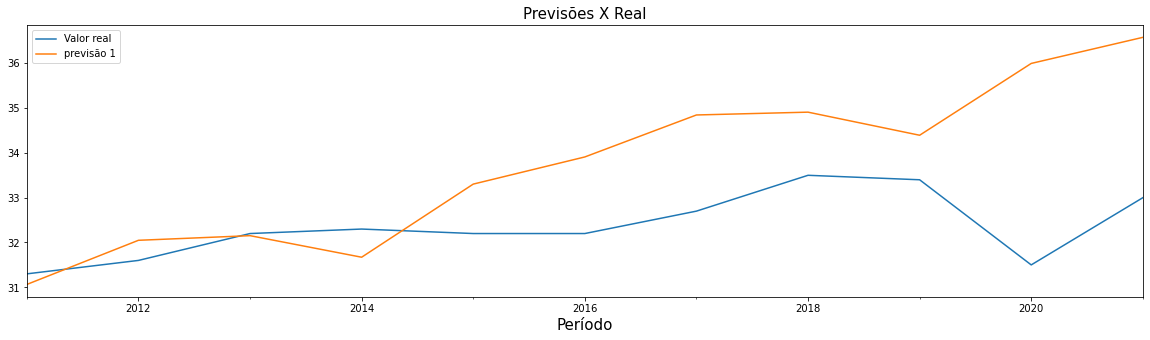

In [109]:
plt.figure(figsize=(20,5))
pd.concat([teste,previsao],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.xlabel("Período", size=15)
plt.legend(['Valor real','previsão 1'])

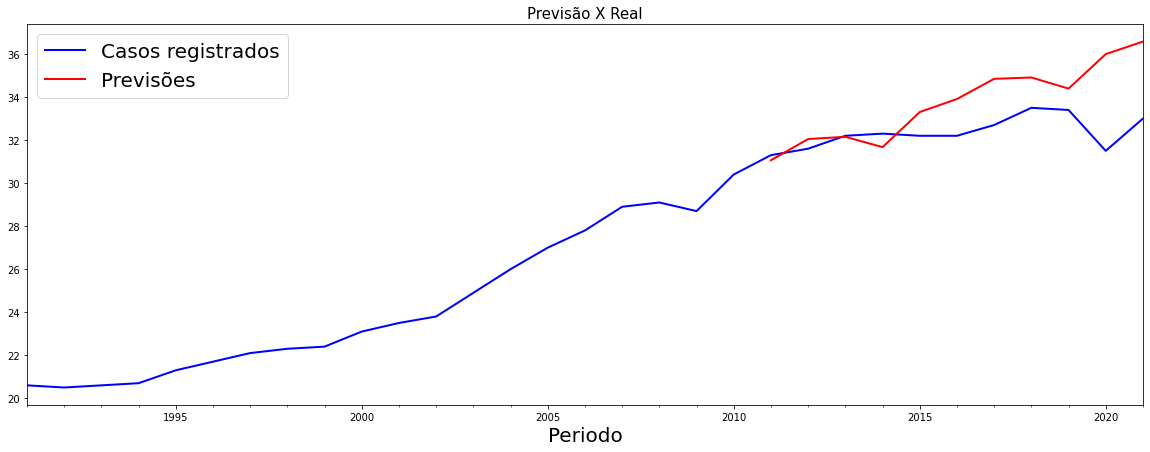

In [110]:
pd.concat([df_co2[['Energy Related CO2missions (Gigatonnes)']],previsao], axis=1).plot(linewidth=2, figsize=(20,7), color=['b','r'])
plt.legend(['Casos registrados','Previsões'], fontsize=20)
plt.xlabel('Periodo', size=20)
plt.title('Previsão X Real',size=15)
plt.show()

In [150]:
stepwise.fit(df_co2[['Energy Related CO2missions (Gigatonnes)']])

previsao2 = stepwise.predict(n_periods=12)

previsao2 = pd.DataFrame(previsao2, 
                              index=pd.date_range(start='2021', end='2031'), columns=['nova previsão'])

In [151]:
previsao2 = previsao2.dropna()
previsao2


,nova previsão
2022-01-01,33.728140
2023-01-01,34.712448
2024-01-01,34.761346
2025-01-01,32.981637
2026-01-01,34.578817
2027-01-01,35.385466
2028-01-01,36.433200
2029-01-01,36.533339
2030-01-01,34.795025
2031-01-01,36.425648


<Figure size 1440x360 with 0 Axes>

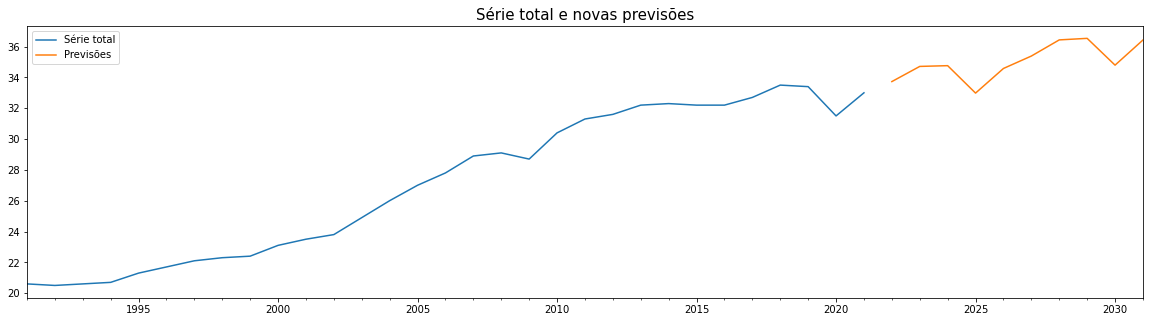

In [146]:
plt.figure(figsize=(20,5))
pd.concat([df_co2[['Energy Related CO2missions (Gigatonnes)']],previsao2],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Série total e novas previsões',size=15)
plt.legend(['Série total','Previsões'])
plt.show()